## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting? 
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

zoo_df = pd.read_csv('zoo.csv')
zoo_df.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


Class Distribution:
1    41
2    20
3     5
4    13
5     4
6     8
7    10
Name: class, dtype: int64


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


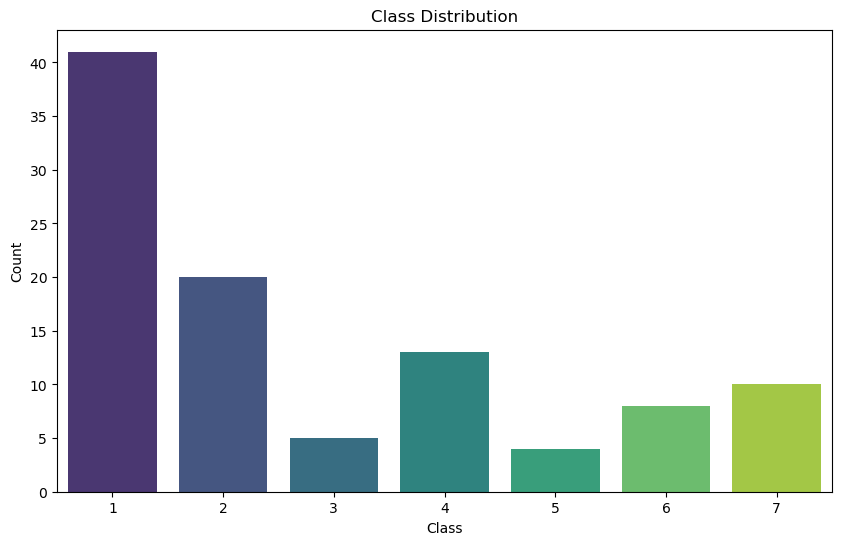

Feature Variation (Standard Deviation):
legs        2.033385
predator    0.499505
catsize     0.498314
hair        0.496921
eggs        0.495325
milk        0.493522
toothed     0.491512
aquatic     0.481335
tail        0.439397
airborne    0.427750
breathes    0.407844
feathers    0.400495
backbone    0.384605
fins        0.376013
domestic    0.336552
venomous    0.271410
dtype: float64


In [40]:
class_counts = zoo_df['class'].value_counts().sort_index()
print("Class Distribution:")
print(class_counts)

#summary statistics
summary_stats = zoo_df.drop(columns=['animal']).describe()
display(summary_stats)

#plot class distribution
plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

#feature variation
feature_variation = zoo_df.drop(columns=['animal', 'class']).std().sort_values(ascending=False)
print("Feature Variation (Standard Deviation):")
print(feature_variation)

In [43]:
X = zoo_df.drop(columns=['animal', 'class']) 
#target variable
y = zoo_df['class']

#split data 50/50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

In [44]:
#normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#select optimal k 
k_values = range(1, 21)
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
avg_scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train_scaled, y_train, cv=skf).mean() for k in k_values]

#best k 
optimal_k = k_values[np.argmax(avg_scores)]
print("Optimal k:", optimal_k)


Optimal k: 1


/Users/nainasharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/Users/nainasharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/nainasharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically prese

In [46]:
#train classifier with optimal k 
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)

#evaluate on test set 
test_score = knn.score(X_test_scaled, y_test)
print(f"Test set accuracy with k={optimal_k}: {test_score:.2f}")

Test set accuracy with k=1: 0.96


/Users/nainasharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


/Users/nainasharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Confusion Matrix:
 [[21  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  1  1  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  5]]
Accuracy: 0.96


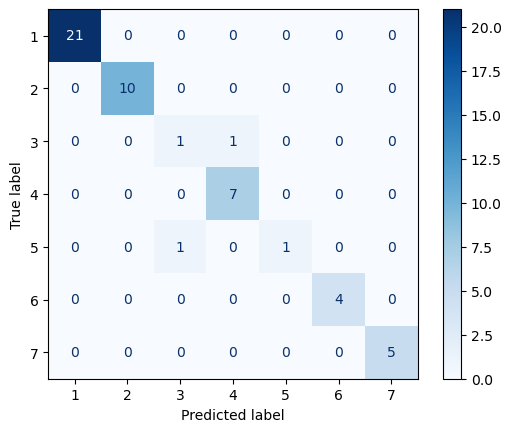

In [48]:
#predict with test set 
y_pred = knn.predict(X_test_scaled)

#confusion. matrix 
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
cm_display.plot(cmap='Blues')
print("Confusion Matrix:\n", cm)

# Calculate accuracy from confusion matrix (optional)
accuracy = np.trace(cm) / np.sum(cm)
print(f"Accuracy: {accuracy:.2f}")


/Users/nainasharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Confusion Matrix:
 [[19  2  0  0  0  0  0]
 [ 0  9  0  1  0  0  0]
 [ 0  1  0  1  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  4  0  0  0  0  0]
 [ 0  1  0  4  0  0  0]]
Classes in test set: [1 2 3 4 5 6 7]
Classes predicted: [1 2 4]
Predicted Probabilities for Test Set:
 [[0.         0.         0.         0.66666667 0.         0.
  0.33333333]
 [1.         0.         0.         0.         0.         0.
  0.        ]
 [1.         0.         0.         0.         0.         0.
  0.        ]
 [1.         0.         0.         0.         0.         0.
  0.        ]
 [0.         1.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.66666667 0.         0.
  0.33333333]
 [0.         1.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.66666667 0.         0.
  0.33333333]
 [1.         0.         0.         0.         0.         0.
  0.        ]
 [0.         1.         0.         0.      

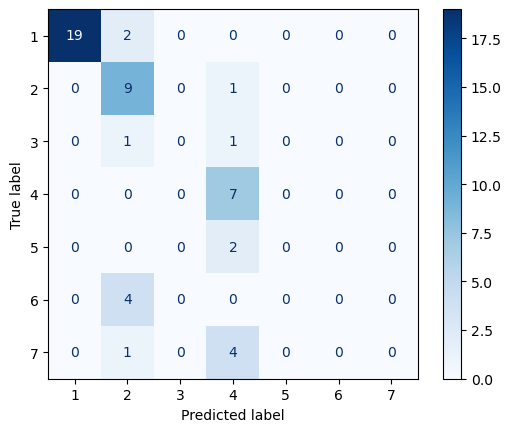

In [52]:
#select specific features
X_selected = zoo_df[['milk', 'aquatic', 'airborne']]
y = zoo_df['class']

#split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.5, stratify=y, random_state=42)

#scale features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

#predict on test set
y_pred = knn.predict(X_test_scaled)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
cm_display.plot(cmap='Blues')
print("Confusion Matrix:\n", cm)

#predict class probabilities 
y_prob = knn.predict_proba(X_test_scaled)

#check if classes are represented 
unique_classes_predicted = np.unique(y_pred)
unique_classes_actual = np.unique(y)
print(f"Classes in test set: {unique_classes_actual}")
print(f"Classes predicted: {unique_classes_predicted}")
print("Predicted Probabilities for Test Set:\n", y_prob)

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data. 

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data. 
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE. 
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

In [31]:
car_df = pd.read_csv('cars_env.csv')
car_df.head()

,veh id,manufacturer,nameplate,model,CVCM class,EPA class,fleet type,fuel type,footprint,baseline price,baseline mpg,baseline sales,predicted mpg
0,1,HONDA,Acura,MDX 4WD,11,SUV,T,G,50.8,45706.20000,22.052700,57380.0,23.011100
1,2,HONDA,Acura,RDX,11,SUV,T,G,45.1,34588.20000,24.174500,21271.0,26.457747
2,3,HONDA,Acura,RL,4,MIDSIZE CARS,C,G,47.6,47934.90000,24.562900,5132.0,23.773800
3,4,HONDA,Acura,TL,4,MIDSIZE CARS,C,G,47.8,35217.81622,27.068237,56720.0,26.884192
4,5,HONDA,Acura,TSX,3,COMPACT CARS,C,G,46.0,29483.10000,29.855173,21996.0,31.871653


Summary Statistics:
         footprint         mpg         price          sales
count  524.000000  524.000000  5.240000e+02     524.000000
mean    49.427847   24.676600  5.165181e+04   24764.820399
std      7.915366    6.432016  8.968875e+04   41233.978890
min     36.692097   12.000000  1.178304e+04       1.000000
25%     44.200000   20.209807  2.521127e+04    2163.500000
50%     47.262519   23.782704  3.253602e+04   10157.000000
75%     52.598319   27.713313  5.098088e+04   27427.250000
max     77.500000   65.777800  1.734000e+06  335544.000000


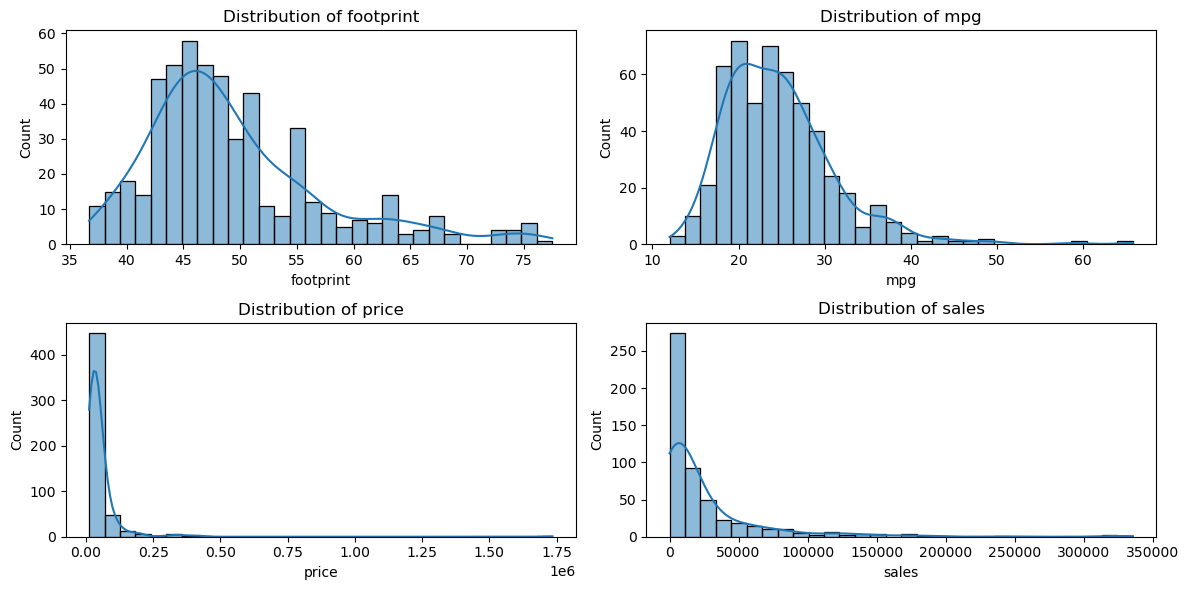

<Figure size 1200x600 with 0 Axes>

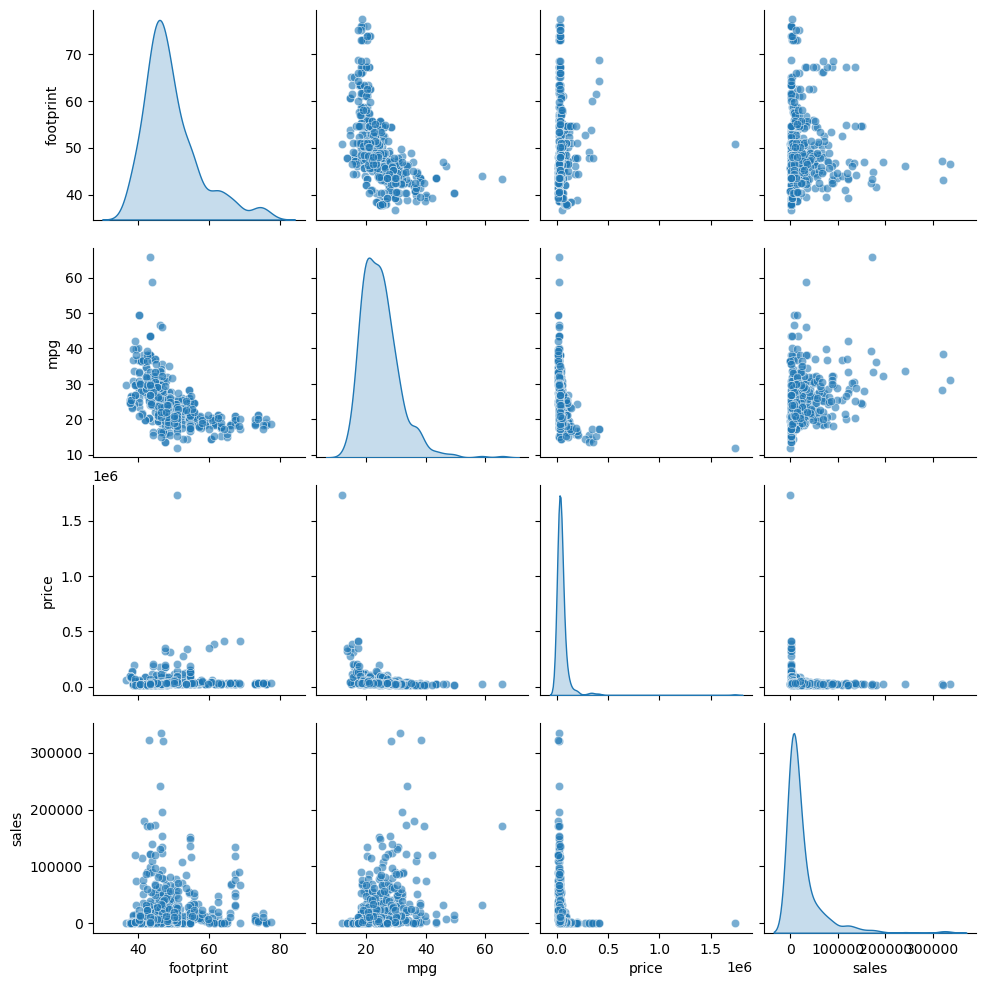

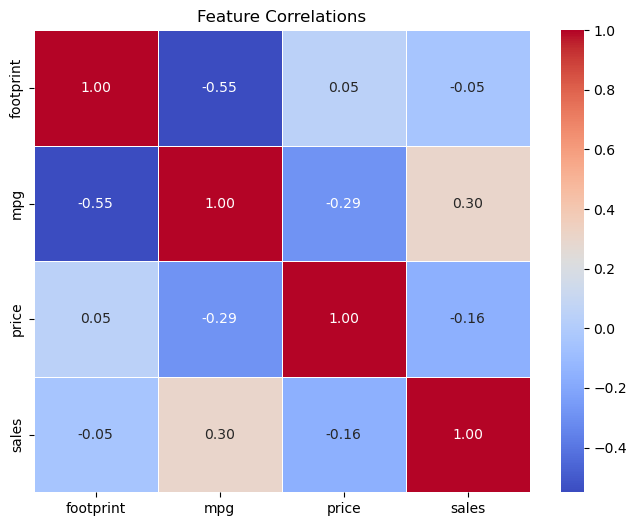

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#selecting columns
eda_df = car_df[['footprint', 'baseline mpg', 'baseline price', 'baseline sales']]
eda_df.columns = ['footprint', 'mpg', 'price', 'sales']  # Renaming for convenience

#summar stats
print("Summary Statistics:\n", eda_df.describe())

#eda
plt.figure(figsize=(12, 6))
for i, col in enumerate(eda_df.columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(eda_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.pairplot(eda_df, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(eda_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlations")
plt.show()


In [55]:
from sklearn.preprocessing import MinMaxScaler

#define features and target
X = car_df[['footprint', 'baseline mpg', 'baseline price']]
y = car_df['baseline sales']

#rename
X.columns = ['footprint', 'mpg', 'price']

#min-max scaling
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print("Normalized Features:\n", X_scaled.describe())

#it does not make sense to normalize y

Normalized Features:
         footprint         mpg       price
count  524.000000  524.000000  524.000000
mean     0.312090    0.235722    0.023150
std      0.193966    0.119604    0.052077
min      0.000000    0.000000    0.000000
25%      0.183982    0.152662    0.007797
50%      0.259029    0.219100    0.012050
75%      0.389783    0.292190    0.022760
max      1.000000    1.000000    1.000000


In [56]:
from sklearn.model_selection import train_test_split

#split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Check shapes
print(f"Training set size: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set size: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training set size: X_train: (366, 3), y_train: (366,)
Test set size: X_test: (158, 3), y_test: (158,)


Optimal k: 6
Lowest SSE on test set: 254595183088.46


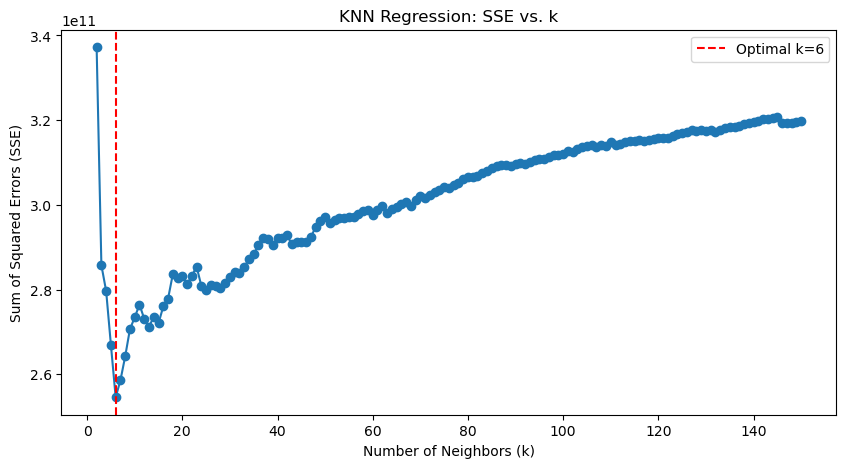

In [57]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

#range of k values
k_values = range(2, 151)
sse_values = []

#SSE
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    sse = np.sum((y_test - y_pred) ** 2)
    sse_values.append(sse)

#find best K
optimal_k = k_values[np.argmin(sse_values)]
best_sse = min(sse_values)

print(f"Optimal k: {optimal_k}")
print(f"Lowest SSE on test set: {best_sse:.2f}")

#graphs
plt.figure(figsize=(10, 5))
plt.plot(k_values, sse_values, marker='o', linestyle='-')
plt.axvline(optimal_k, color='red', linestyle='--', label=f'Optimal k={optimal_k}')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("KNN Regression: SSE vs. k")
plt.legend()
plt.show()


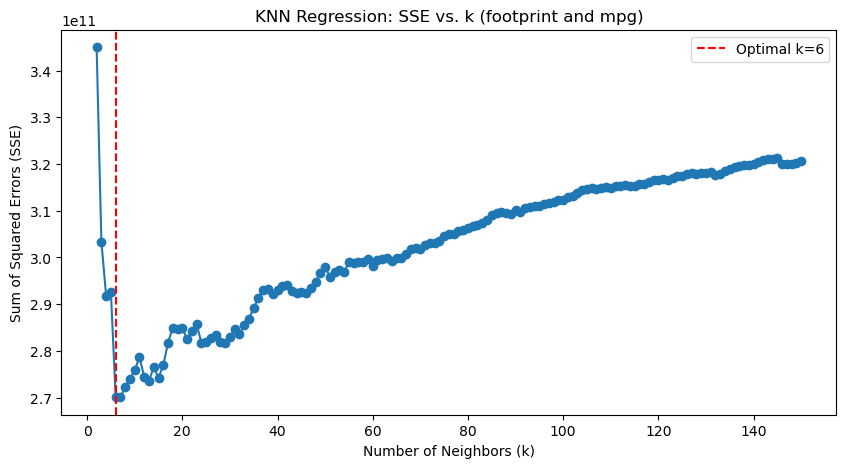

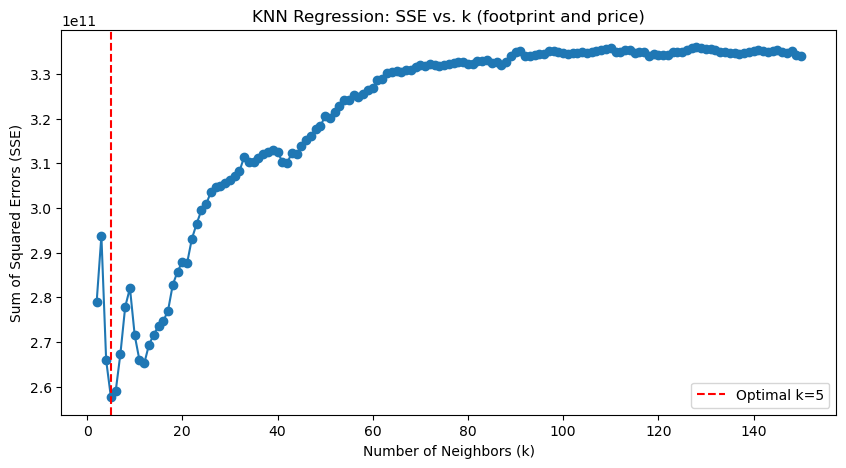

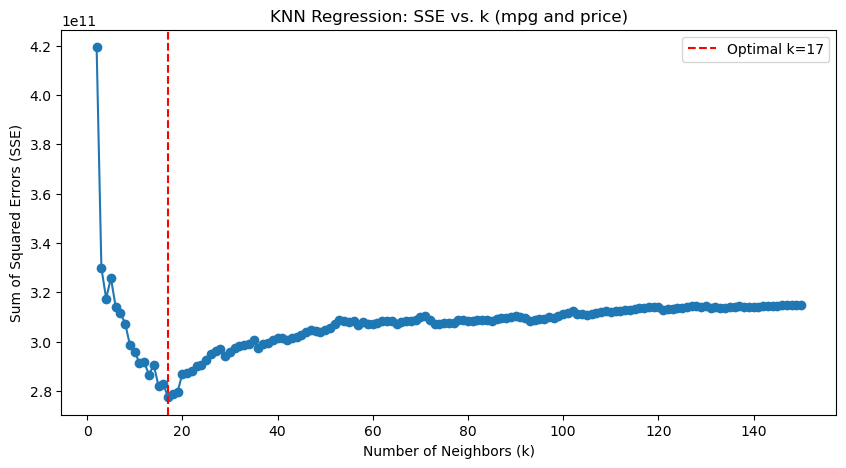

Features: ('footprint', 'mpg')
Optimal k: 6
Lowest SSE on test set: 270076473295.88

Features: ('footprint', 'price')
Optimal k: 5
Lowest SSE on test set: 257643342693.36

Features: ('mpg', 'price')
Optimal k: 17
Lowest SSE on test set: 277451286473.38



In [58]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

#define feature pairs
feature_pairs = [
    ['footprint', 'mpg'],
    ['footprint', 'price'],
    ['mpg', 'price']
]

results = {}
for features in feature_pairs:
    X_pair = X_scaled[features]
    
    #split data
    X_train, X_test, y_train, y_test = train_test_split(X_pair, y, test_size=0.3, random_state=42)
    
    #define K range
    k_values = range(2, 151)
    sse_values = []

    #SSE
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        sse = np.sum((y_test - y_pred) ** 2)
        sse_values.append(sse)

    #best K
    optimal_k = k_values[np.argmin(sse_values)]
    best_sse = min(sse_values)
    
    results[tuple(features)] = {
        'optimal_k': optimal_k,
        'best_sse': best_sse,
        'sse_values': sse_values
    }

    #graph
    plt.figure(figsize=(10, 5))
    plt.plot(k_values, sse_values, marker='o', linestyle='-')
    plt.axvline(optimal_k, color='red', linestyle='--', label=f'Optimal k={optimal_k}')
    plt.xlabel("Number of Neighbors (k)")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.title(f"KNN Regression: SSE vs. k ({features[0]} and {features[1]})")
    plt.legend()
    plt.show()

for pair, result in results.items():
    print(f"Features: {pair}")
    print(f"Optimal k: {result['optimal_k']}")
    print(f"Lowest SSE on test set: {result['best_sse']:.2f}\n")


The combination of all 3 variables has the lowest SSE. This could be because all three of these variables provides a more comprehensive approach to baseline prices of these cars.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.